In [ ]:
setwd("/root/workspace/code/sc-transformer/eval/plot")
source("/root/workspace/code/sc-transformer/utils/utils.R")
library(tibble)
library(RColorBrewer)
library(dynutils)
library(stringr)
library(Hmisc)
library(plyr)
library(gdata)
source("knit_table.R")

parser <- ArgumentParser()
parser$add_argument("--fig", type = "integer", default = 1)
o <- parser$parse_known_args()[[1]]

In [2]:
if (o$fig == 1) {
    # dogma scib (main)
    dataset <- "dogma"
    sota <- T
    mosaic <- F
    scmib <- F
    transfer <- F
    outdir <- "../../paper/metrics/fig 2"
    img_head <- "Fig2c_"
}
if (o$fig == 2) {
    # teadog scib
    dataset <- "teadog"
    sota <- T
    mosaic <- F
    scmib <- F
    transfer <- F
    outdir <- "../../paper/metrics/supplementary fig 2"
    img_head <- "sFig2_"
}
if (o$fig == 3) {
    # dogma scmib (main)
    dataset <- "dogma"
    sota <- F
    mosaic <- T
    scmib <- T
    transfer <- F
    outdir <- "../../paper/metrics/fig 3"
    img_head <- "Fig3b_"
}
if (o$fig == 4) {
    # teadog scmib
    dataset <- "teadog"
    sota <- F
    mosaic <- T
    scmib <- T
    transfer <- F
    outdir <- "../../paper/metrics/supplementary fig 3"
    img_head <- "sFig3_"
}
if (o$fig == 5) {
    # dogma + sota, scib
    dataset <- "dogma"
    sota <- T
    mosaic <- T
    scmib <- F
    transfer <- F
    outdir <- "../../paper/metrics/supplementary fig 3"
    img_head <- "sFig3_"
}
if (o$fig == 6) {
    # teadog + sota, scib
    dataset <- "teadog"
    sota <- T
    mosaic <- T
    scmib <- F
    transfer <- F
    outdir <- "../../paper/metrics/supplementary fig 3"
    img_head <- "sFig3_"
}
if (o$fig == 7) {
    # dogma transfer, scmib
    dataset <- "dogma"
    sota <- F
    mosaic <- T
    scmib <- T
    transfer <- T
    outdir <- "../../paper/metrics/supplementary fig 5"
    img_head <- "sFig5_"
}
if (o$fig == 8) {
    # dogma transfer + sota, scib
    dataset <- "dogma"
    sota <- T
    mosaic <- T
    scmib <- F
    transfer <- T
    outdir <- "../../paper/metrics/supplementary fig 5"
    img_head <- "sFig5_"
}

In [3]:
init <- ifelse(transfer, "sp_00003699", "sp_00001899")

if (sota & !mosaic) {
    xls_metrics_path <- paste0("data/scib_metrics_sota_",        dataset, "_e0_", init, "_sorted.xlsx")
} else if (!sota & mosaic) {
    xls_metrics_path <- paste0("data/scib_metrics_mosaic_",      dataset, "_e0_", init, "_sorted.xlsx")
} else {
    xls_metrics_path <- paste0("data/scib_metrics_sota+mosaic_", dataset, "_e0_", init, "_sorted.xlsx")
}

if (scmib) {
    xls_metrics_path <- paste0("data/scmib_metrics_", dataset, "_", init, "_sorted.xlsx")
}

mkdir(outdir, remove_old = F)

In [4]:
metrics_tab <- read.xls(xls_metrics_path)
# metrics_tab <- as.data.frame(metrics_tab[, -1])
metrics_tab <- as.data.frame(metrics_tab)
names(metrics_tab)[1] <- "Method"
metrics_tab <- metrics_tab[order(metrics_tab$`overall_score`,  decreasing = T), ]


metrics_tab <- metrics_tab[metrics_tab[["Method"]] != "midas_feat+wnn", ]

In [5]:
if (scmib) {
    group_batch <- c("iLISI_feat",  "graph_conn_feat",  "kBET_feat", "iLISI_embed", "graph_conn_embed", "kBET_embed")
    group_mod <- c("ASW_mod", "FOSCTTM", "Label_transfer", "AUROC", "Pearson_RNA", "Pearson_ADT")
    group_bio <- c("NMI_feat",  "ARI_feat",  "il_score_f1_feat",  "cLISI_feat", "NMI_embed", "ARI_embed", "il_score_f1_embed", "cLISI_embed")
    metrics_tab <- add_column(metrics_tab, "Task" = metrics_tab[, 1], .after = "Method")
    metrics_tab[["Method"]] <- "midas_embed"
} else {
    group_batch <- c("iLISI", "graph_conn", "kBET")
    group_mod <- NULL
    group_bio <- c("NMI", "ARI", "il_score_f1", "cLISI")
}
n_metrics_batch <- length(group_batch)
n_metrics_mod <- length(group_mod)
n_metrics_bio <- length(group_bio)

In [6]:
names(metrics_tab) <- str_replace_all(names(metrics_tab), c(
    "iLISI" = "Graph iLISI",
    "graph_conn" = "Graph connectivity",
    "il_score_f1" = "Isolated label F1",
    "batch_score" = "Batch correction",
    "ASW_mod" = "Modality ASW",
    "Label_transfer" = "Label transfer F1",
    "AUROC" = "ATAC AUROC",
    "Pearson_RNA" = "RNA Pearson's R",
    "Pearson_ADT" = "ADT Pearson's R",
    "mod_score" = "Modality alignment",
    "cLISI" = "Graph cLISI",
    "bio_score" = "Biological conservation",
    "overall_score" = "Overall score",
    "_embed" = " (embed)",
    "_feat" = " (feat)"
))
metrics_tab[, "Method"] <- str_replace_all(metrics_tab[, "Method"], c(
    "midas_embed" = "MIDAS",
    "midas_feat\\+wnn" = "MIDAS-feat + WNN",
    "bbknn" = "BBKNN + average",
    "harmony\\+wnn" = "Harmony + WNN",
    "seurat_cca\\+wnn" = "Seurat-CCA + WNN",
    "seurat_rpca\\+wnn" = "Seurat-RPCA + WNN",
    "scanorama_embed\\+wnn" = "Scanorama-embed + WNN",
    "pca\\+wnn" = "PCA + WNN",
    "scanorama_feat\\+wnn" = "Scanorama-feat + WNN",
    "liger\\+wnn" = "LIGER + WNN",
    "mofa" = "MOFA"
))
metrics_tab[, "Task"] <- str_replace_all(metrics_tab[, "Task"], c(
    "dogma_|teadog_|_transfer" = ""
    # "_" = "-",
    # "paired-full" = "paired+full",
    # "single-full" = "single+full",
    # "-single$" = "-single-diag"
))
if (transfer) {
    metrics_tab[, "Method"] <- str_replace_all(metrics_tab[, "Method"], c("MIDAS" = "MIDAS (transfer)"))
}

In [7]:
if (scmib) {
    column_info <- data.frame(id = colnames(metrics_tab),
        group = c("Text", "Image", rep("batch_score", (1 + n_metrics_batch)),
                                rep("mod_score", (1 + n_metrics_mod)),
                                rep("bio_score", (1 + n_metrics_bio)), "overall_score"),
        geom = c("text", "image", rep("circle", n_metrics_batch), "bar",
                                rep("circle", n_metrics_mod), "bar",
                                rep("circle", n_metrics_bio), "bar", "bar"),
        width = c(   10.5,   2.5, rep(1, n_metrics_batch), 2,
                                rep(1, n_metrics_mod), 2,
                                rep(1, n_metrics_bio), 2, 2),
        overlay = F)
} else {
    column_info <- data.frame(id = colnames(metrics_tab),
                            group = c("Text", "Image", rep("batch_score", (1 + n_metrics_batch)),
                                                        rep("bio_score", (1 + n_metrics_bio)), "overall_score"),
                            geom =  c("text", "image", rep("circle", n_metrics_batch), "bar",
                                                        rep("circle", n_metrics_bio), "bar", "bar"),
                            width = c(  12,     2.5, rep(1, n_metrics_batch), 2,
                                                        rep(1, n_metrics_bio), 2, 2),
                            overlay = F)
}


In [8]:
# https://www.datanovia.com/en/blog/top-r-color-palettes-to-know-for-great-data-visualization/
palettes <- list("overall_score" = "Oranges",
                 "batch_score" = "Greens",
                 "mod_score" = "PuRd",
                 "bio_score" = "Blues")

In [9]:
g <- scIB_knit_table(data = metrics_tab, dataset = dataset, column_info = column_info, row_info = data.frame(id = metrics_tab$Method),
                     palettes = palettes, task = T, usability = F)

The following `from` values were not present in `x`: paired_full, single_full, paired_abc, paired_ab, paired_ac, paired_bc, single, single_atac, single_rna, single_adt, paired_a, paired_b, paired_c

Warning message:
"`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated."


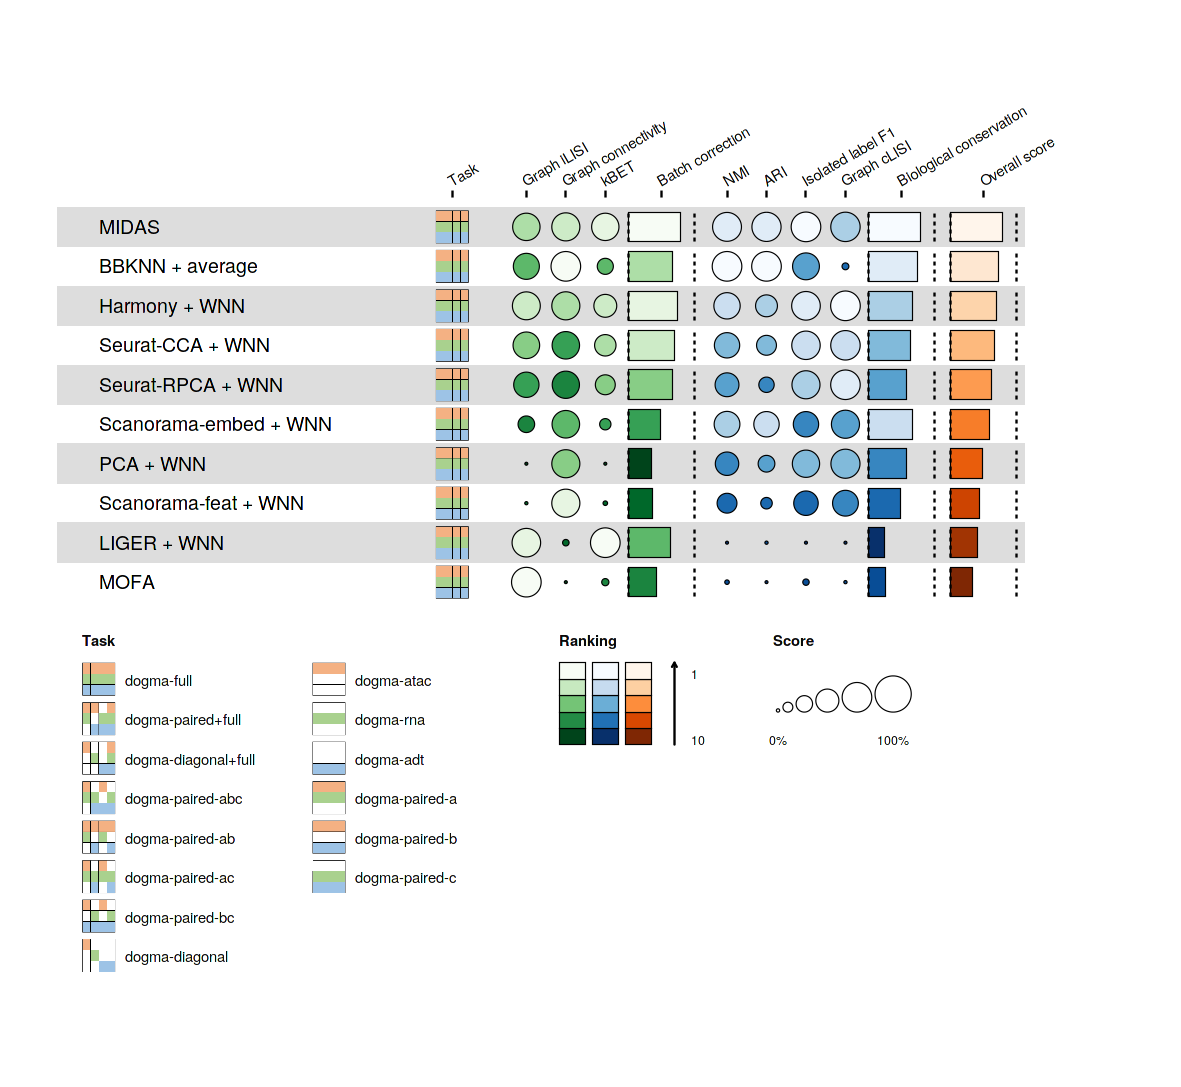

In [10]:
if (scmib) {
    w <- 300
    h <- 150
} else {
    w <- 250
    h <- 230
}
options(repr.plot.width = w / 25.4, repr.plot.height = h / 25.4)
g

In [11]:
now <- Sys.time()
ggsave(paste0(outdir, "/", img_head, strsplit(basename(xls_metrics_path), split = "\\.")[[1]][1],
    # format(now, "_%Y%m%d_%H%M%S"),  ".png"), g, device = "png", dpi = "retina",
    ".png"), g, device = "png", dpi = "retina",
    width = w, height = h, units = "mm")
ggsave(paste0(outdir, "/", img_head, strsplit(basename(xls_metrics_path), split = "\\.")[[1]][1],
    ".pdf"), g, device = "pdf", dpi = "retina",
    width = w, height = h, units = "mm")